### Applying Convolutional Neural Network on Mnist Dataset


Data Description

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits (0 to 9). The database contains 60,000 training images and 10,000 testing images each of size 28x28.




Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<Figure size 432x288 with 0 Axes>

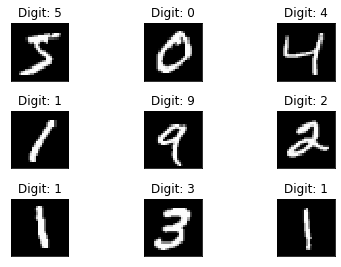

<Figure size 432x288 with 0 Axes>

In [22]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np


(X_train, y_train), (X_test, y_test) = mnist.load_data() 
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.figure()


X_train contains 60,000 training images’ data each of size 28x28 and y_train contains their corresponding labels. Similarly, X_test contains 10,000 testing images’ data each of dimension 28x28 and y_test contains their corresponding labels.

#### 1.	Preparing the data


In [23]:
from keras import backend as k

img_rows , img_cols = 28, 28


if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [24]:
from keras.utils import np_utils

y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

Since the output of the model can comprise any of the digits between 0 to 9. so, we need 10 classes in output. To make output for 10 classes, use keras.utils.to_categorical function, which will provide the 10 columns. Out of these 10 columns, only one value will be one and the rest 9 will be zero and this one value of the output will denote the class of the digit.

#### 2.	Building and compiling of the model

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= inpx))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


##### Explanation of the working of each layer in the CNN model:

Conv2D layer is used to convolve the image and is using 64 filters each of size (3*3). 

the MaxPooling2D layer picks the max value out of a matrix of size (2*2).

Dropout rate is equal to 0.25. 

Dense layer is having 10 neurons for 10 classes of output that is using the softmax function.

In [30]:
import tensorflow
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from keras import losses

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
# Adam optimization is a stochastic gradient descent method that is based on
# adaptive estimation of first-order and second-order moments.

#### 3.	Training and evaluating the model

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
batch_size = 128
num_epoch = 5
#model training
fitted_model = model.fit(X_train, y_train, batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_val, y_val))

Epoch 1/5
264/264 [==============================] - 4s 14ms/step - loss: 0.3348 - accuracy: 0.8998 - val_loss: 0.0806 - val_accuracy: 0.9762
Epoch 2/5
264/264 [==============================] - 3s 12ms/step - loss: 0.1091 - accuracy: 0.9679 - val_loss: 0.0514 - val_accuracy: 0.9845
Epoch 3/5
264/264 [==============================] - 3s 10ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0466 - val_accuracy: 0.9845
Epoch 4/5
264/264 [==============================] - 3s 9ms/step - loss: 0.0628 - accuracy: 0.9804 - val_loss: 0.0408 - val_accuracy: 0.9872
Epoch 5/5
264/264 [==============================] - 3s 10ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9899


In [33]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.034870970994234085
Test accuracy: 0.9887999892234802


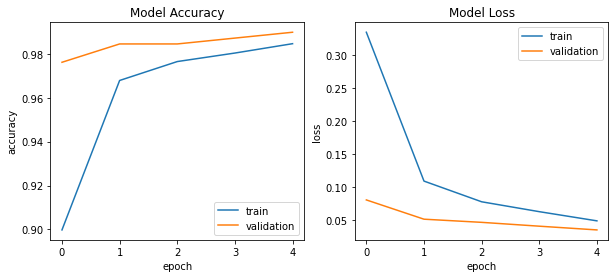

In [34]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(fitted_model)


#### 4.	Finalize the Model and Make Predictions

In [ ]:
# save model
model.save('saved_model.h5')

In [ ]:
from keras.models import load_model

# Load model
model = load_model('saved_model.h5')

In [ ]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(sample_image):
	# load the image
	img = load_img(sample_image, grayscale=True, target_size=(28, 28),color_mode='grayscale',)
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/My Drive/Colab Notebooks/sample_image.png')
	# load model
	model = load_model('saved_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

7


In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/My Drive/Colab Notebooks/bir.png')
	# load model
	model = load_model('saved_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

1


In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/My Drive/Colab Notebooks/dokuz.png')
	# load model
	model = load_model('saved_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

9


In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/My Drive/Colab Notebooks/sekiz.png')
	# load model
	model = load_model('saved_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

8


In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('/content/drive/My Drive/Colab Notebooks/eight.png')
	# load model
	model = load_model('saved_model.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

8
